# Análise de Negócios

## Preços dos combustíveis ofertados nos postos

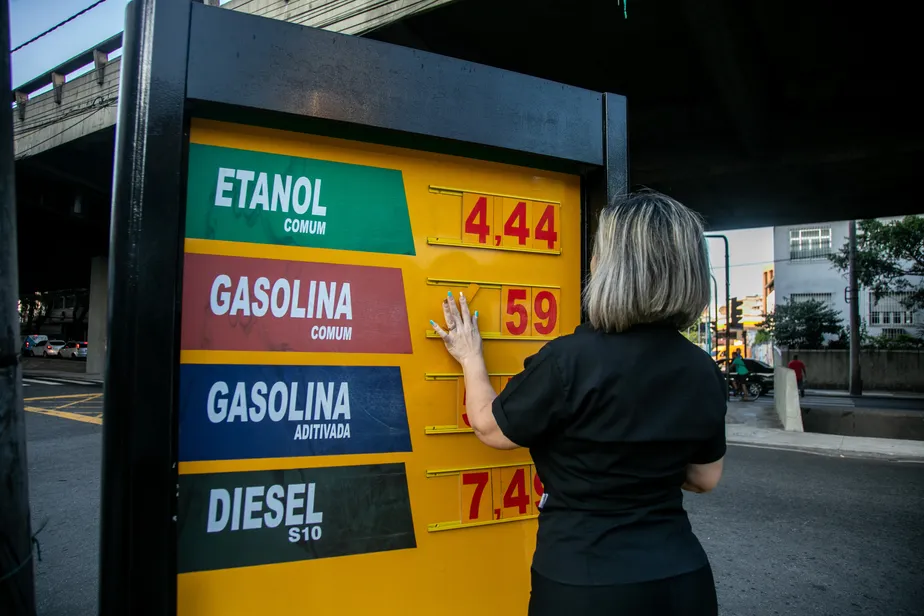

### Importação bibliotecas

In [2]:
# tratamento e manipulação dos dados
import pandas as pd
import numpy as np

# dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# conexão com banco de dados
import pyodbc

import locale
import warnings
warnings.filterwarnings('ignore')

### Carregamento dos dados

In [3]:
# Parâmetros de conexão
server = 'DESKTOP-09VL69J'
database = 'anp_fiap'
driver = '{ODBC Driver 18 for SQL Server}'

# Conexão
dados_conexao = (
    f"DRIVER={driver};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
    f"TrustServerCertificate=yes;"
    f"Encrypt=yes;"
)

In [4]:
# Tentativa de conexão
try:
    conexao = pyodbc.connect(dados_conexao)
    print("Conexão bem-sucedida!")
except pyodbc.Error as e:
    print(f"Erro ao conectar ao banco de dados: {e}")
finally:
    # Verifica se a conexão foi criada antes de tentar fechar
    if 'conexao' in locals() and conexao:
        conexao.close()
        print("Conexão fechada.")

Conexão bem-sucedida!
Conexão fechada.


In [4]:
# criando conexao 
conexao = pyodbc.connect(dados_conexao)
cursor = conexao.cursor()

try:
    df = pd.read_sql("SELECT * FROM dados_anp", conexao)
except pyodbc.Error as e:
    # Captura erros relacionados ao banco de dados
    print(f"Erro na conexão com o banco de dados: {e}")
finally:
    cursor.close()
    conexao.close()

In [5]:
df.head(2)

regiao estado municipio                       Revenda                 CNPJ  \
0     NE     BA  SALVADOR  PETROBRAS DISTRIBUIDORA S.A.   34.274.233/0015-08   
1     NE     BA  SALVADOR  PETROBRAS DISTRIBUIDORA S.A.   34.274.233/0015-08   

            nome_rua numero_rua complemento bairro        cep     produto  \
0  RUA EDISTIO PONDE        474        NULL  STIEP  41770-395         GNV   
1  RUA EDISTIO PONDE        474        NULL  STIEP  41770-395  DIESEL S10   

  data_coleta  valor_venda  valor_compra unidade_medida  \
0  2018-01-02         2.37          1.74       R$ / mÂ³   
1  2018-01-02         3.24          3.14     R$ / litro   

                       bandeira  
0  PETROBRAS DISTRIBUIDORA S.A.  
1  PETROBRAS DISTRIBUIDORA S.A.

### Tratamento da base

In [6]:
# copia da base original para realizar os tratamentos e posteriormente a análise
dados_combustiveis = df.copy()

In [7]:
# exibindo a dimensão do df
print(f'Número de linhas: {dados_combustiveis.shape[0]:,}')
print(f'Número de colunas: {dados_combustiveis.shape[1]:,}')

Número de linhas: 5,782,524
Número de colunas: 16


In [8]:
# identificando dados vazios
dados_combustiveis.isnull().sum()

regiao            0
estado            0
municipio         0
Revenda           0
CNPJ              0
nome_rua          0
numero_rua        0
complemento       0
bairro            0
cep               0
produto           0
data_coleta       0
valor_venda       0
valor_compra      0
unidade_medida    0
bandeira          0
dtype: int64

In [9]:
# verificando os tipos de dados
dados_combustiveis.dtypes

regiao                    object
estado                    object
municipio                 object
Revenda                   object
CNPJ                      object
nome_rua                  object
numero_rua                object
complemento               object
bairro                    object
cep                       object
produto                   object
data_coleta       datetime64[ns]
valor_venda              float64
valor_compra             float64
unidade_medida            object
bandeira                  object
dtype: object

Os dados vieram de acordo com o banco, nenhum tratametno necessário

### Análise exploratória de dados

In [10]:
# visualizando as colunas no df
dados_combustiveis.columns

Index(['regiao', 'estado', 'municipio', 'Revenda', 'CNPJ', 'nome_rua',
       'numero_rua', 'complemento', 'bairro', 'cep', 'produto', 'data_coleta',
       'valor_venda', 'valor_compra', 'unidade_medida', 'bandeira'],
      dtype='object')

In [11]:
# Definindo a localidade para português do Brasil
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

# adicionando informação de ano e mês
dados_combustiveis = dados_combustiveis.assign(
    ano=dados_combustiveis['data_coleta'].dt.year,
    mes=dados_combustiveis['data_coleta'].dt.month,
    nome_mes=dados_combustiveis['data_coleta'].dt.strftime('%B')
)

# Selecionando as colunas necessárias
dados_combustiveis = dados_combustiveis[['ano', 'mes', 'nome_mes', 'data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda', 'valor_compra']]

In [12]:
dados_combustiveis.head(2)

ano  mes nome_mes data_coleta regiao estado municipio  \
0  2018    1  janeiro  2018-01-02     NE     BA  SALVADOR   
1  2018    1  janeiro  2018-01-02     NE     BA  SALVADOR   

                       bandeira     produto  valor_venda  valor_compra  
0  PETROBRAS DISTRIBUIDORA S.A.         GNV         2.37          1.74  
1  PETROBRAS DISTRIBUIDORA S.A.  DIESEL S10         3.24          3.14

In [13]:
dados_combustiveis.describe().round(2)

ano         mes                    data_coleta  valor_venda  \
count  5782524.00  5782524.00                        5782524   5782524.00   
mean      2020.75        6.10  2021-03-17 23:05:01.169800704         4.69   
min       2018.00        1.00            2018-01-01 00:00:00         1.76   
25%       2019.00        3.00            2019-06-24 00:00:00         3.65   
50%       2021.00        6.00            2021-05-03 00:00:00         4.50   
75%       2022.00        9.00            2022-11-24 00:00:00         5.69   
max       2024.00       12.00            2024-06-28 00:00:00         9.79   
std          1.94        3.38                            NaN         1.27   

       valor_compra  
count    5782524.00  
mean           0.52  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max            5.09  
std            1.22

Parece que o campo valor de compra não esta corretamente preenchido

In [14]:
dados_combustiveis['valor_compra'].value_counts() / len(dados_combustiveis) * 100

valor_compra
0.00    84.014403
3.15     0.153895
3.10     0.145819
3.17     0.144608
3.13     0.138382
          ...    
1.28     0.000035
1.34     0.000035
4.97     0.000017
4.89     0.000017
5.09     0.000017
Name: count, Length: 358, dtype: float64

84% da base esta sem valor preenchido para coluna 'valor_compra', portanto vou excluir essa coluna do df

In [15]:
dados_combustiveis.drop(columns='valor_compra', inplace=True)

Quais são os produtos comercializados?

In [16]:
print(f'Os produtos comercializados são: {dados_combustiveis.produto.unique()}')

Os produtos comercializados são: ['GNV' 'DIESEL S10' 'ETANOL' 'GASOLINA' 'DIESEL' 'GASOLINA ADITIVADA']


Quais anos estão na base?

In [17]:
print(f'Os anos presentes na base são: {dados_combustiveis.ano.unique()}')

Os anos presentes na base são: [2018 2019 2020 2021 2022 2023 2024]


Visualizando os valores mínimos, médios e máximos por ano

In [18]:
dados_produto_ano = dados_combustiveis.groupby(['produto', 'ano']).agg(
                                                    valor_venda_min=('valor_venda', 'min'),
                                                    valor_venda_max=('valor_venda', 'max'),
                                                    valor_venda_mean=('valor_venda', 'mean')
                                                ).round(2)

dados_produto_ano

valor_venda_min  valor_venda_max  valor_venda_mean
produto            ano                                                     
DIESEL             2018             2.80             5.20              3.50
                   2019             2.87             4.99              3.60
                   2020             2.45             5.09              3.42
                   2021             3.10             6.99              4.69
                   2022             3.14             9.00              6.63
                   2023             3.97             7.99              5.76
                   2024             4.69             8.19              5.94
DIESEL S10         2018             2.84             5.30              3.59
                   2019             2.79             5.09              3.69
                   2020             2.46             5.38              3.51
                   2021             2.81             6.96              4.74
                   2022             3.59             9.65              6.73
                   2023             4.19             9.00              5.86
                   2024             4.99             8.89              6.00
ETANOL             2018             1.90             4.98              3.13
                   2019             2.10             5.47              3.17
                   2020             1.80             5.15              3.18
                   2021             2.05             7.90              4.67
                   2022             2.49             7.98              4.85
                   2023             2.69             6.96              4.00
                   2024             2.63             6.60              3.90
GASOLINA           2018             3.37             6.29              4.45
                   2019             3.39             6.29              4.42
                   2020             2.87             5.90              4.28
                   2021             3.10             8.00              5.89
                   2022             3.49             8.99              6.32
                   2023             4.09             8.19              5.53
                   2024             4.55             7.99              5.78
GASOLINA ADITIVADA 2020             3.69             6.00              4.59
                   2021             3.46             8.99              6.04
                   2022             4.09             9.28              6.47
                   2023             3.47             9.79              5.71
                   2024             4.69             8.89              5.97
GNV                2018             1.76             4.10              2.73
                   2019             2.00             4.56              3.22
                   2020             2.00             4.78              3.17
                   2021             2.38             6.70              3.89
                   2022             3.17             7.99              5.04
                   2023             2.39             6.71              4.64
                   2024             3.54             6.69              4.74

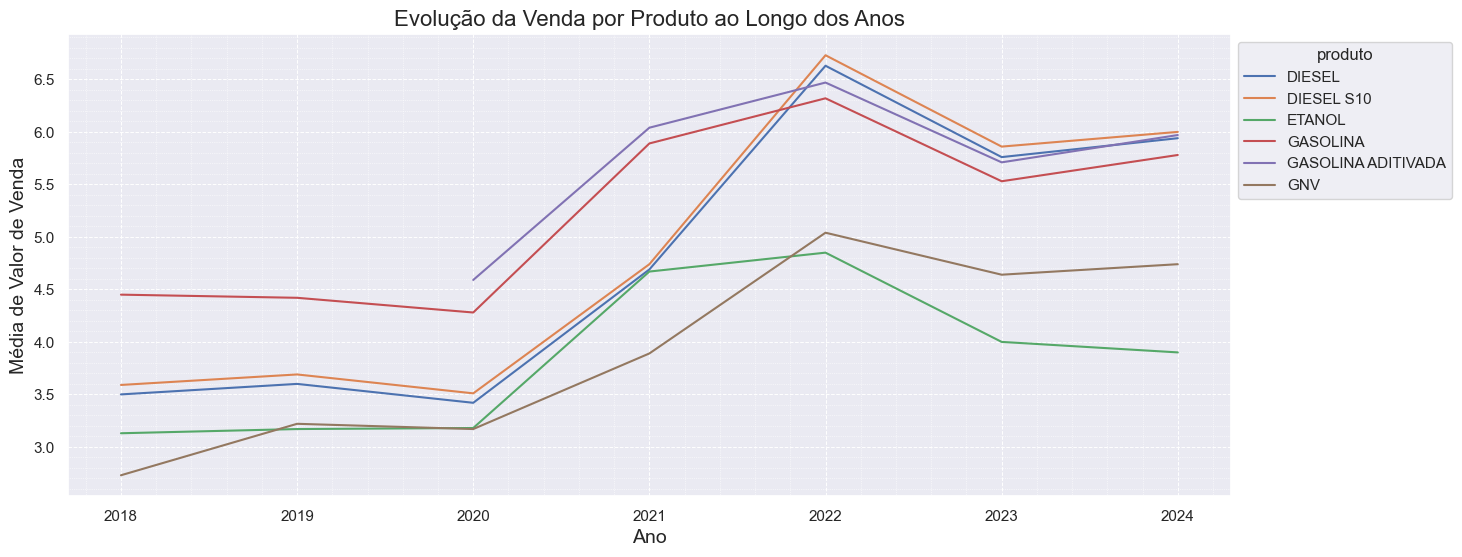

In [19]:
# definindo tema do gráfico
sns.set_theme(style="darkgrid")

# instanciando figura e plotando o grafico
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(data=dados_produto_ano, x='ano', y='valor_venda_mean', hue='produto')

# formatando titulo e os eixos
ax.set_title('Evolução da Venda por Produto ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Média de Valor de Venda', fontsize=14)

# formatando os grids do grafico
ax.grid(True, which='major', linestyle='--', linewidth=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# config legenda do grafico
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

Tivemos um aumento notável em 2021, momento de pandemia, que seguiu com crescimento até 2022, em 2023 houve uma retração nos preços comercializados

In [20]:
dados_combustiveis.groupby(['produto', 'ano', 'estado']).agg(
                                                    valor_venda_min=('valor_venda', 'min'),
                                                    valor_venda_max=('valor_venda', 'max'),
                                                    valor_venda_mean=('valor_venda', 'mean')
                                                ).round(2)

valor_venda_min  valor_venda_max  valor_venda_mean
produto ano  estado                                                    
DIESEL  2018 AC                 3.38             4.89              4.29
             AL                 3.10             4.23              3.60
             AM                 3.09             4.49              3.63
             AP                 3.29             4.51              3.88
             BA                 2.99             5.20              3.51
...                              ...              ...               ...
GNV     2024 RN                 4.49             5.19              5.12
             RS                 3.99             5.94              4.71
             SC                 4.29             5.75              4.97
             SE                 4.89             5.19              4.96
             SP                 3.58             5.59              4.52

[1036 rows x 3 columns]

In [21]:
# definindo função para plotar grafico de linhas
def plot_lineplot(df, x_axis, y_axis, produto):
    df_filtrado = df.loc[df['produto'] == produto]

    sns.set_theme(style="darkgrid")
    sns.set_palette('deep')

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.lineplot(data=df, x=x_axis, y=y_axis, hue='estado')

    # formatando titulo e os eixos
    ax.set_title(f'Evolução da Venda de {produto} ao Longo dos Anos', fontsize=16)
    ax.set_xlabel('Ano', fontsize=14)
    ax.set_ylabel('Média de Valor de Venda', fontsize=14)

    # formatando os grids do grafico
    ax.grid(True, which='major', linestyle='--', linewidth=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5)
    ax.minorticks_on()

    # config legenda do grafico
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    plt.show()

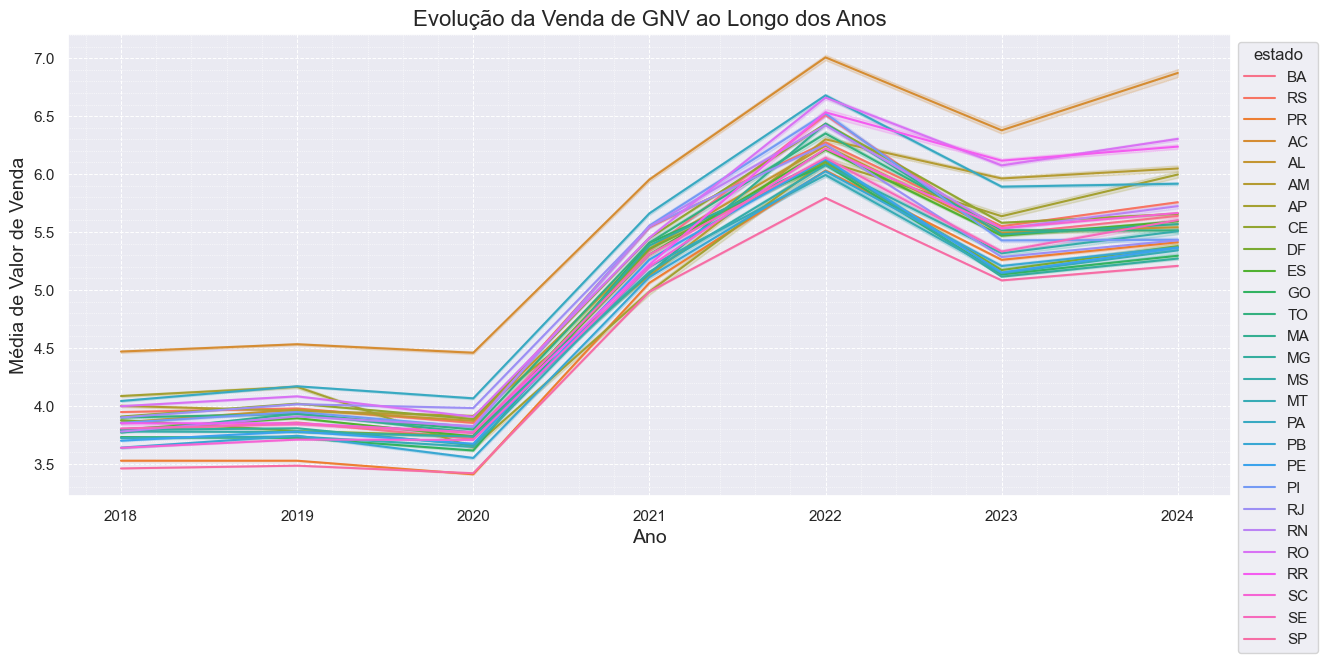

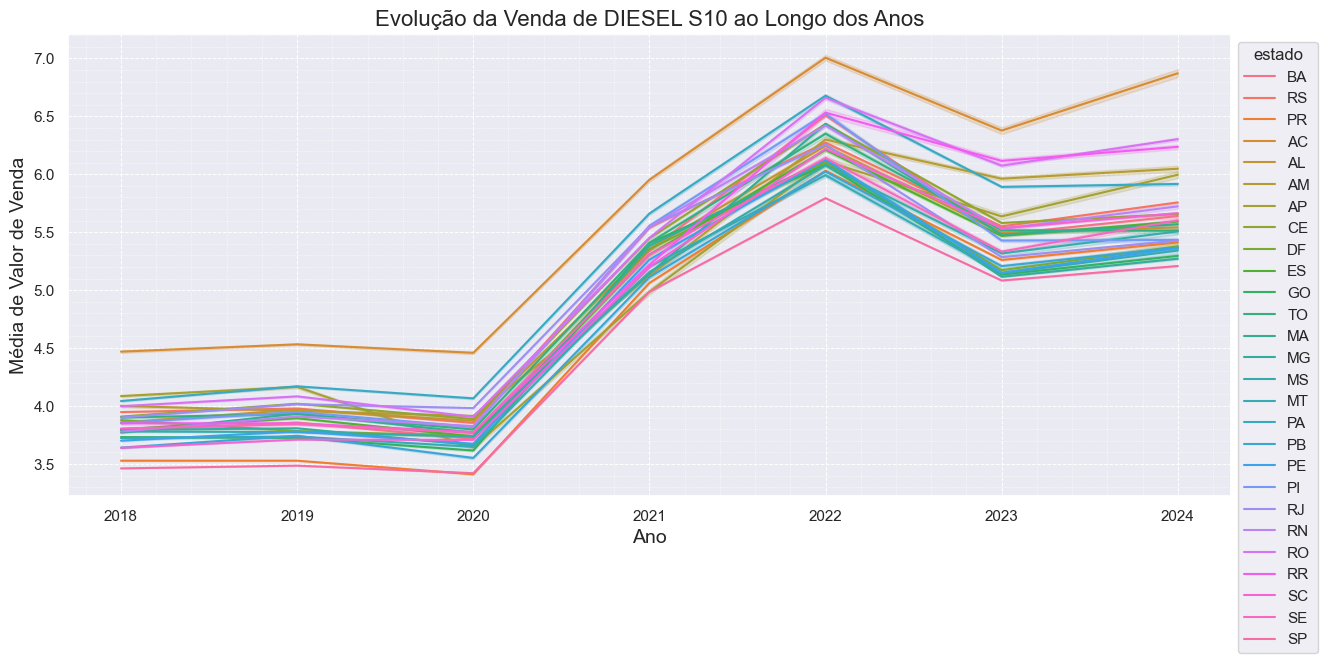

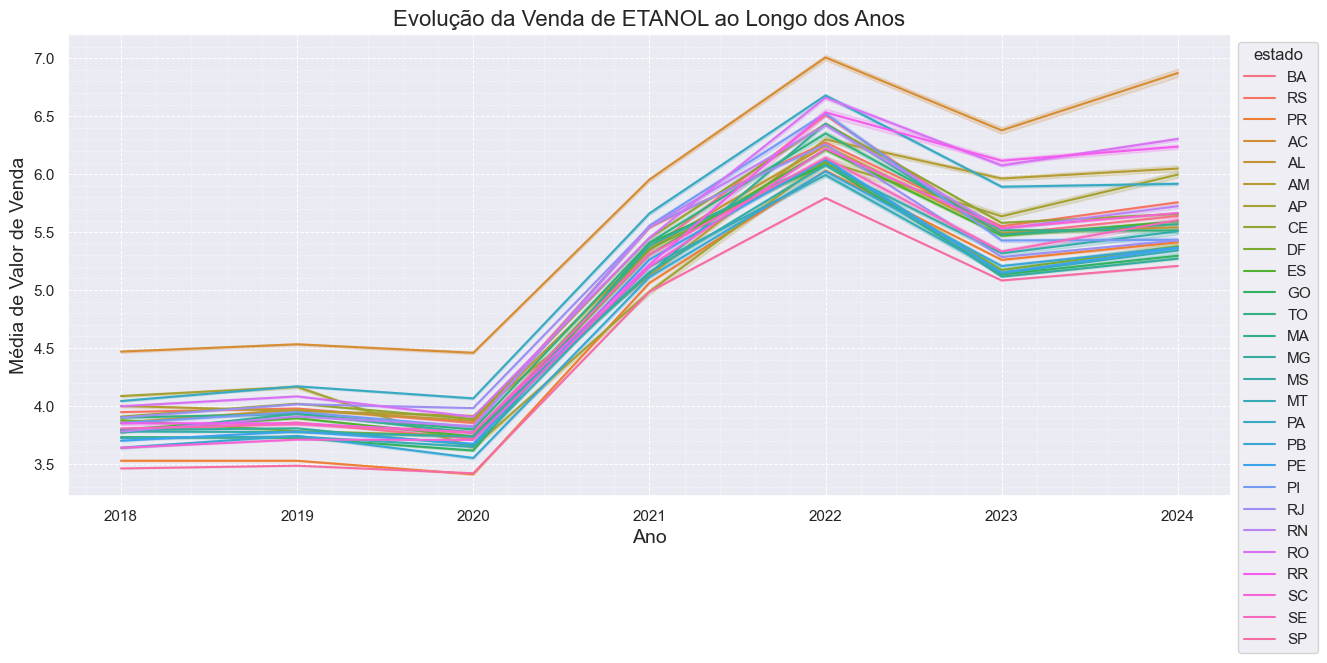

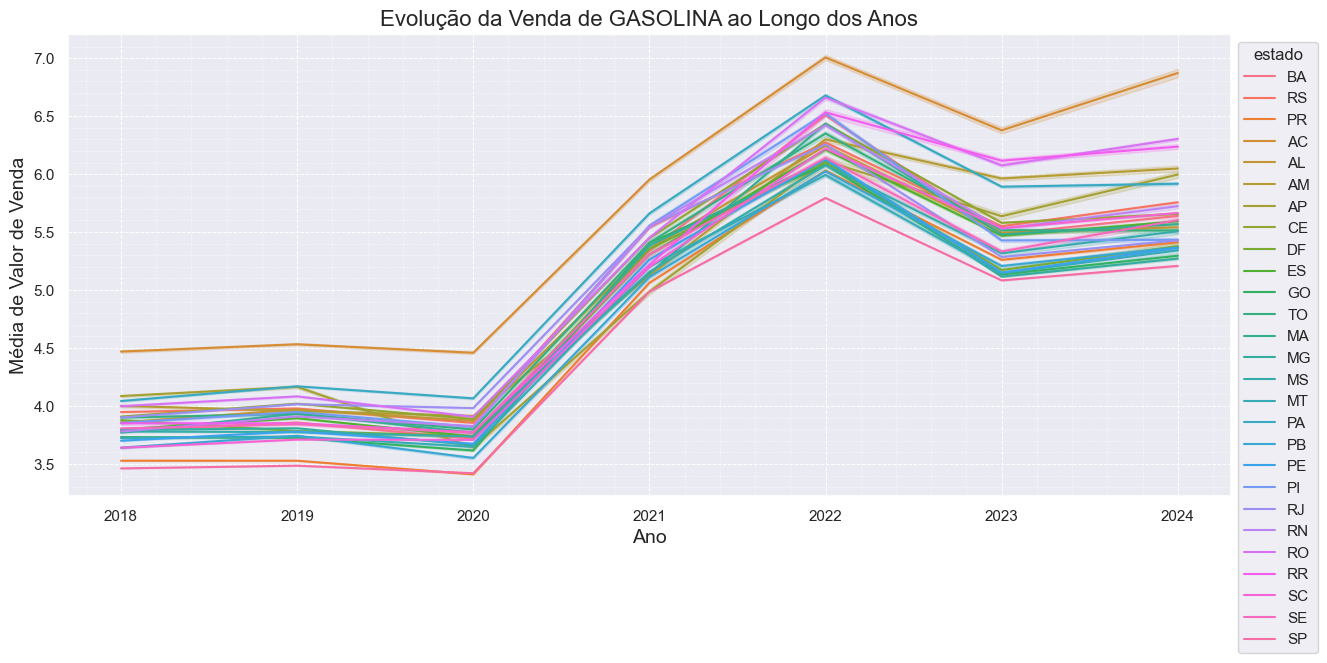

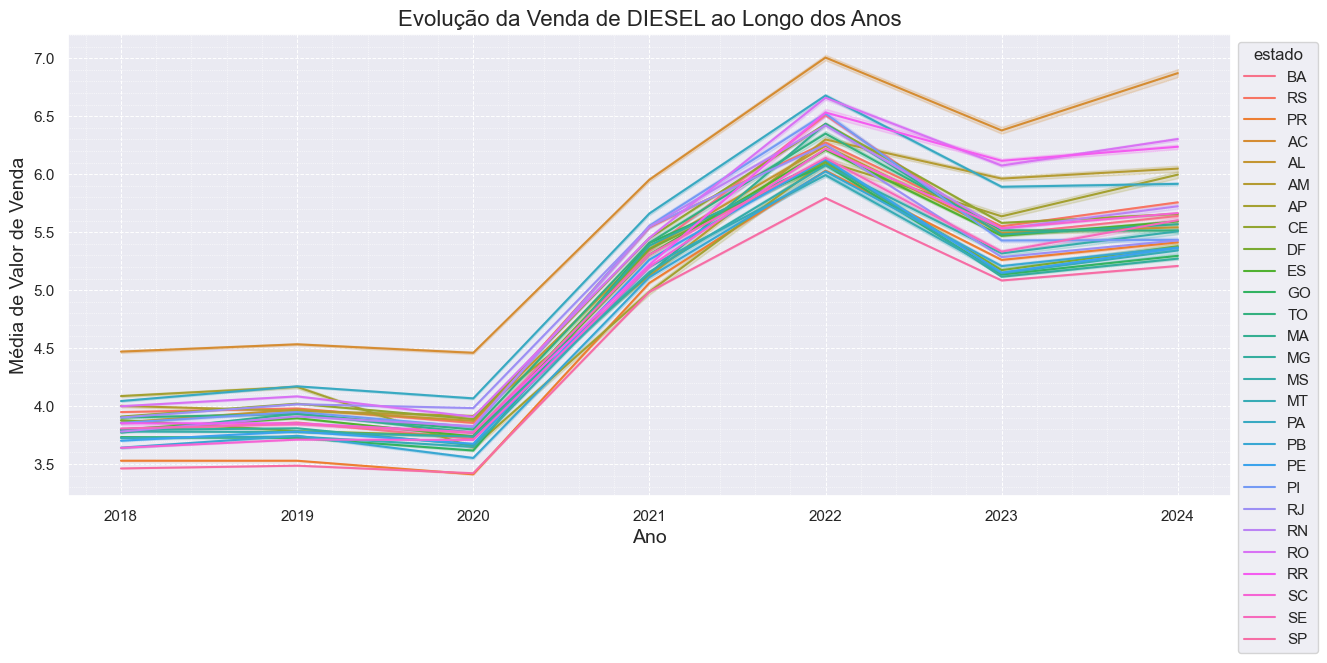

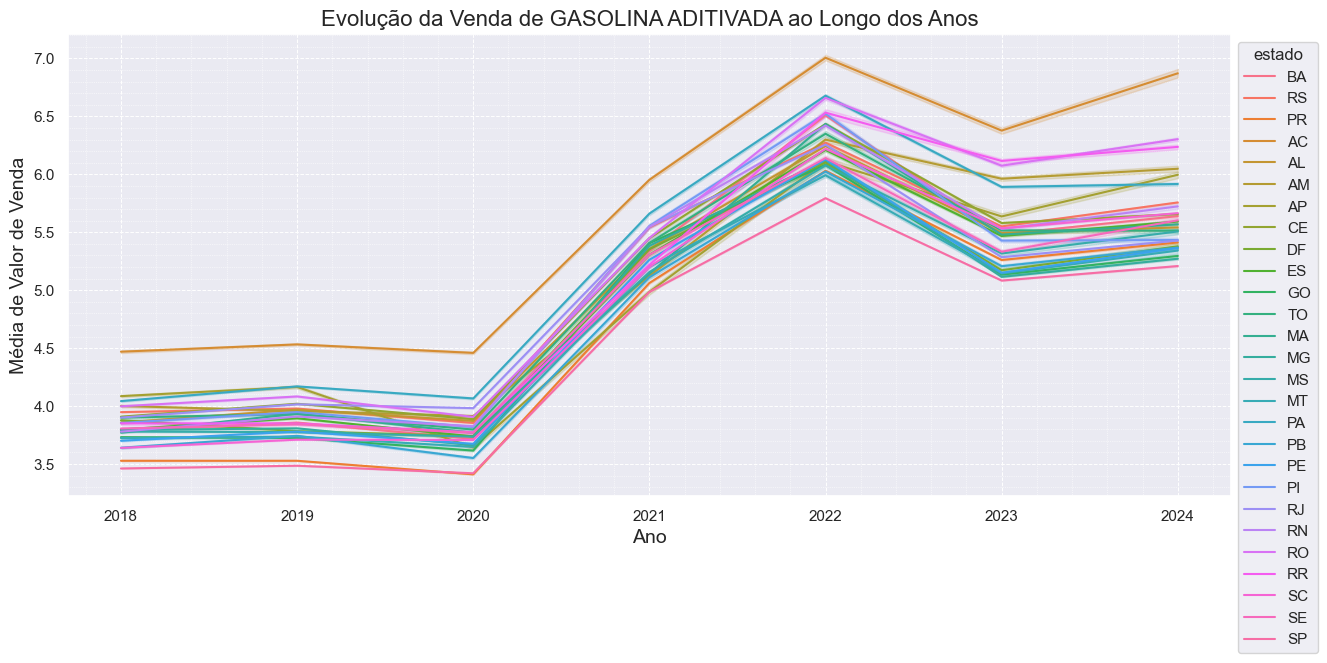

In [22]:
for produto in dados_combustiveis.produto.unique():
    plot_lineplot(df=dados_combustiveis, x_axis='ano', y_axis='valor_venda', produto=produto)

In [23]:
# definindo função para plotar boxplot
def plot_boxplot(df, axis_x, axis_y, produto):
    df_filtrado = df.loc[df['produto'] == produto]

    sns.set_theme(style="darkgrid")
    sns.set_palette('deep')

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.boxplot(data=df_filtrado, x=df[axis_x], y=df[axis_y])

    ax.set_title(f'Valor de Venda (R$) de {produto} por Estado', loc = 'left', fontsize = 18)
    ax.set_xlabel('Estado', fontsize = 12)
    ax.set_ylabel('Valor de Venda (RS)', fontsize = 12)

    plt.show()


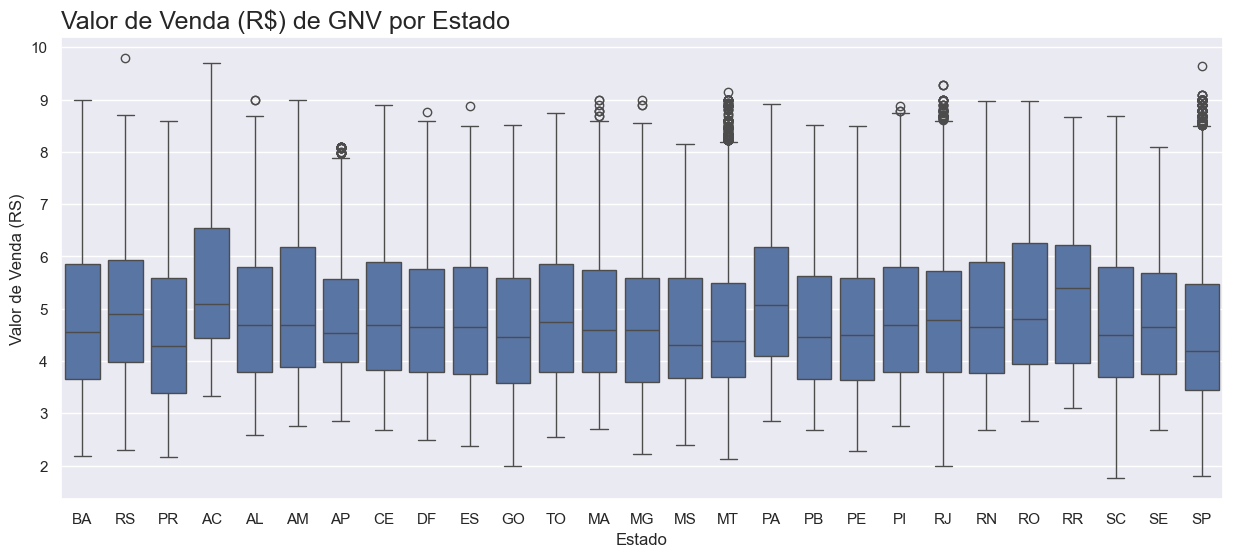

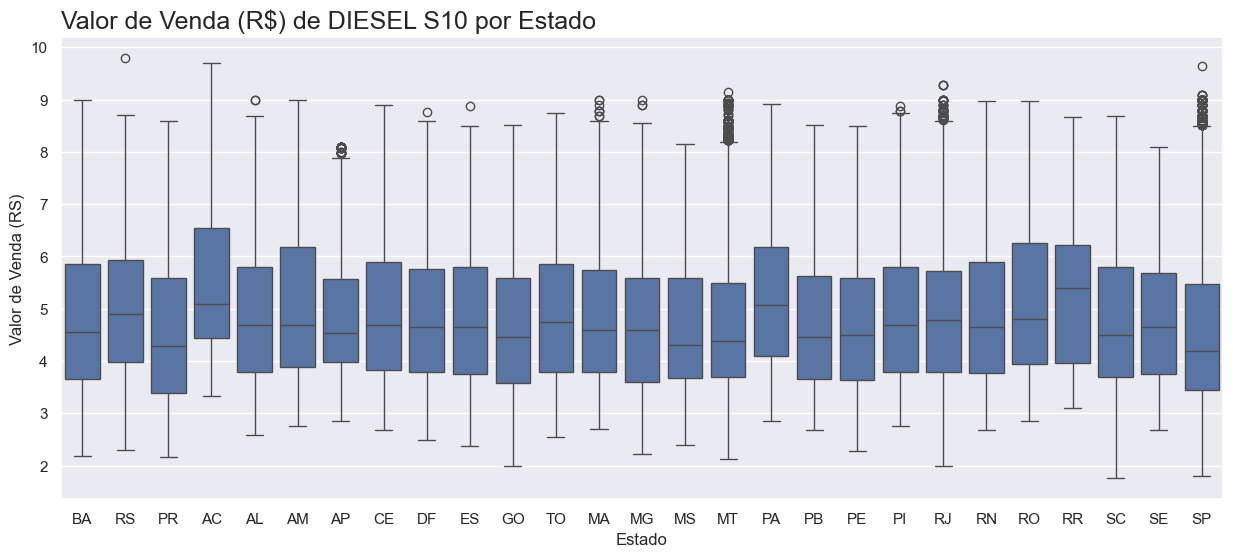

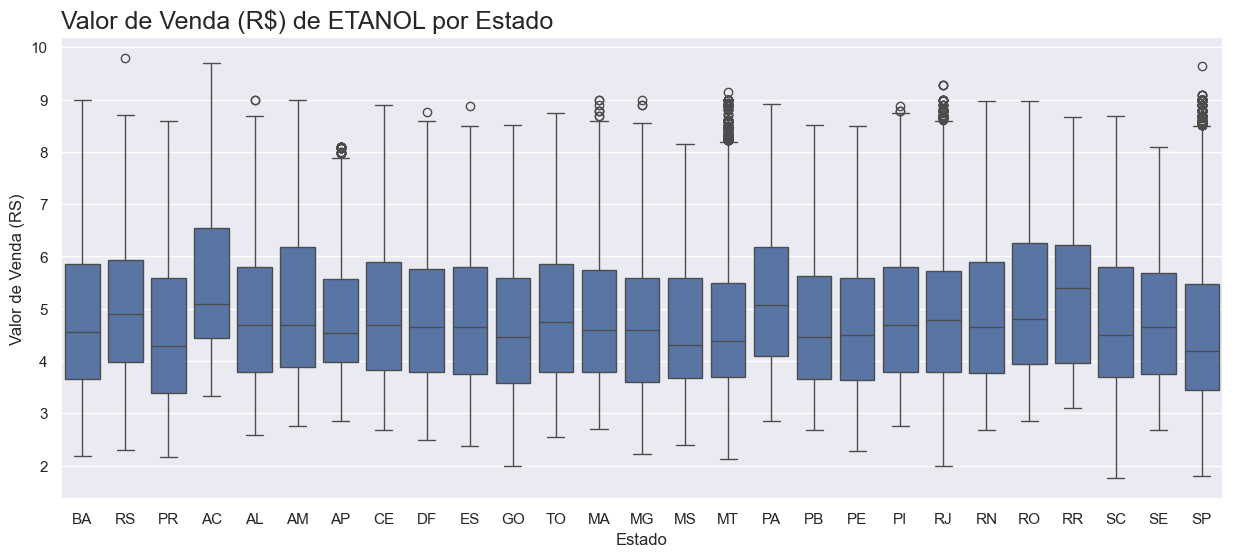

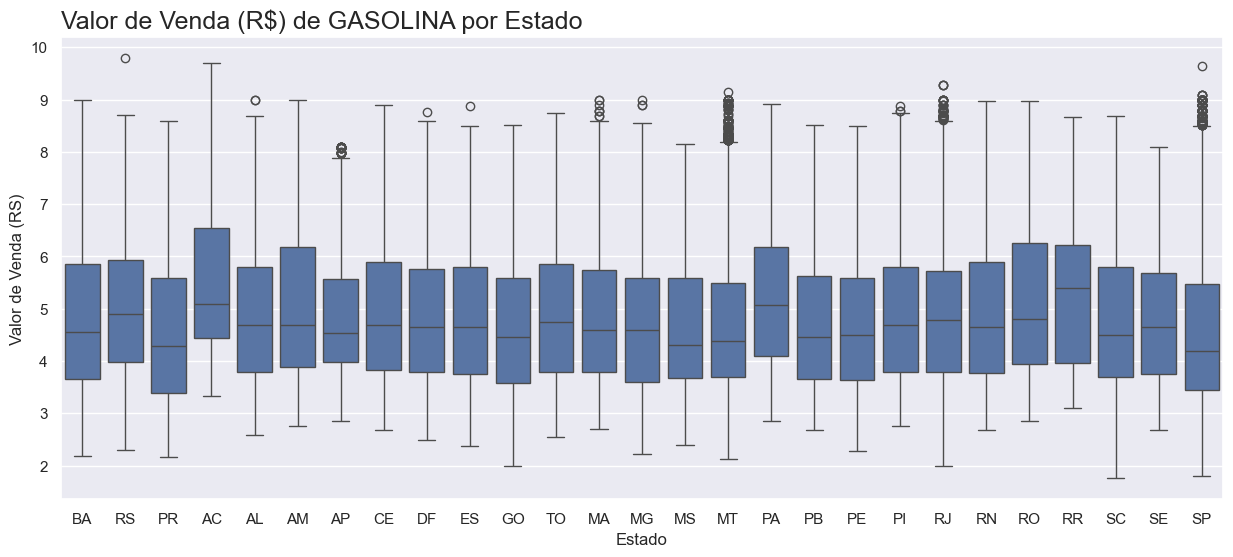

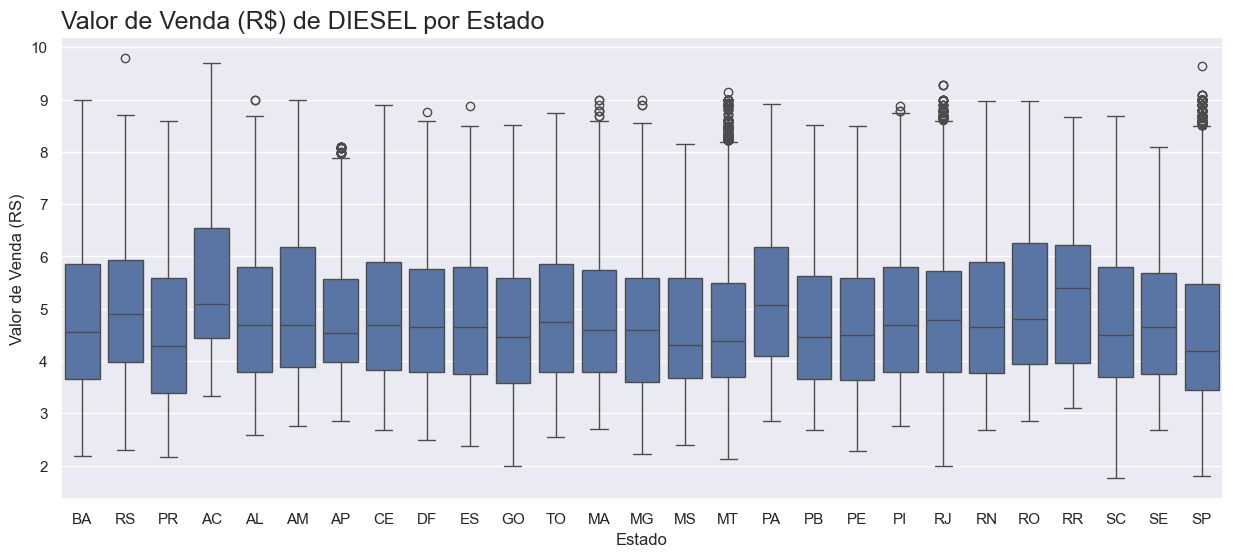

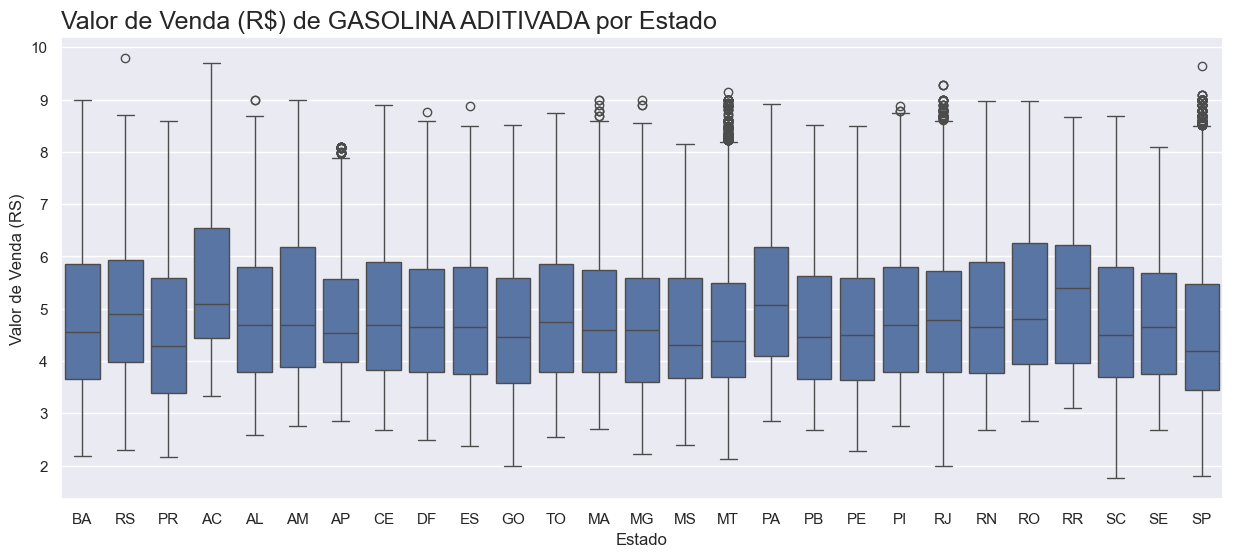

In [24]:
for produto in dados_combustiveis.produto.unique():
    plot_boxplot(df=dados_combustiveis, axis_x='estado', axis_y='valor_venda', produto=produto)

In [25]:
# preço médio por estado
def plot_barplot(df, x_axis, y_axis, produto):
    df_filtrado = df.loc[df['produto'] == produto]

    sns.set_theme(style="darkgrid")
    sns.set_palette('deep')

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(data=df_filtrado, x=df[x_axis], y=df[y_axis])

    ax.set_title(f'Valor de Venda (R$) de {produto} por Estado', loc = 'left', fontsize = 18)
    ax.set_xlabel('Estado', fontsize = 12)
    ax.set_ylabel('Valor de Venda (RS)', fontsize = 12)

    plt.show()

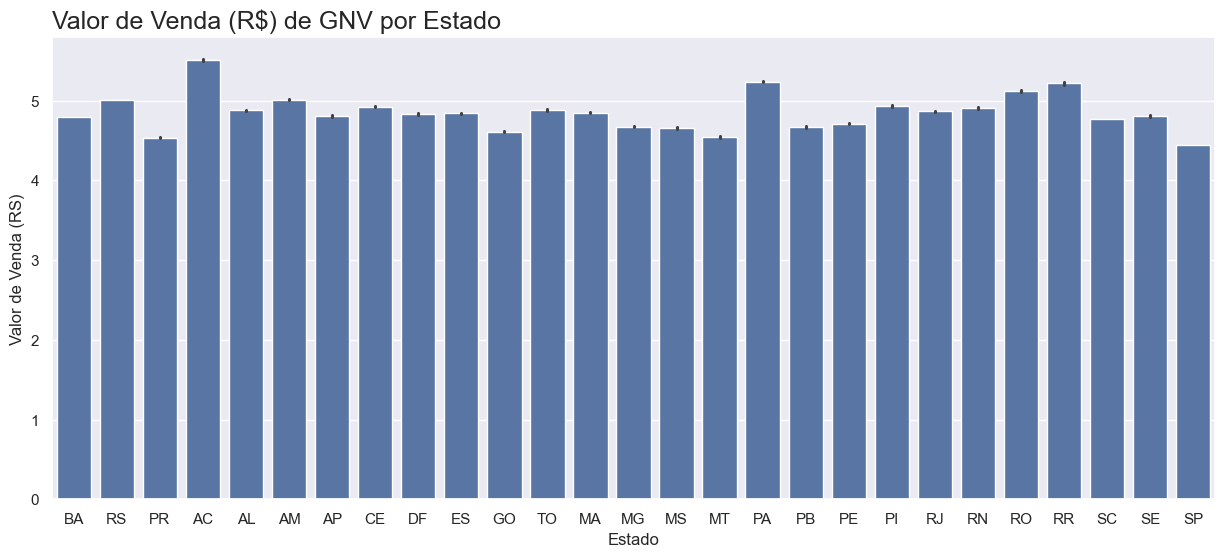

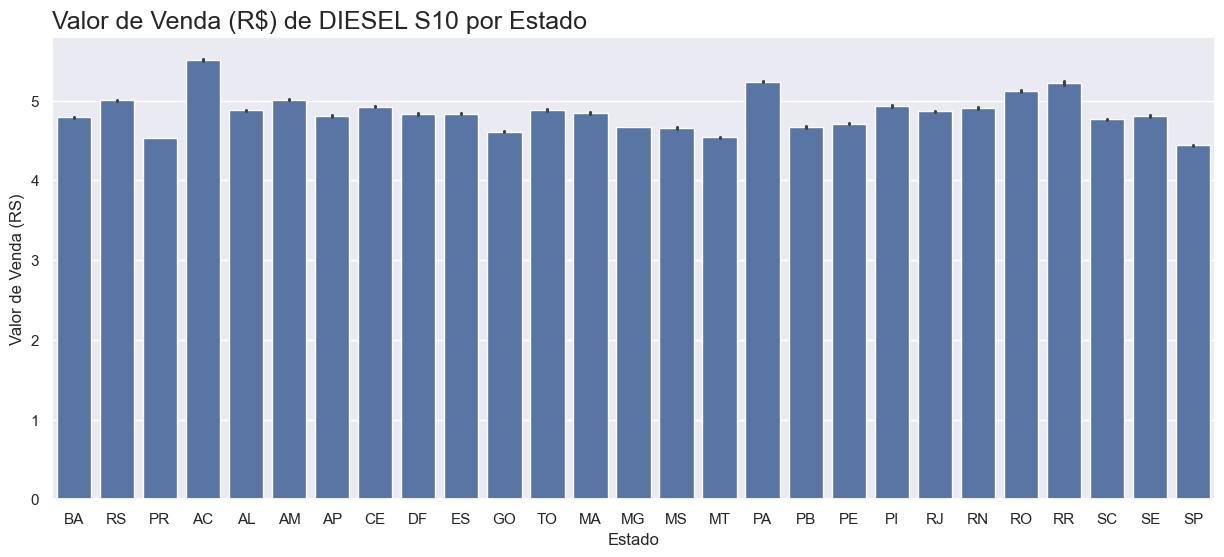

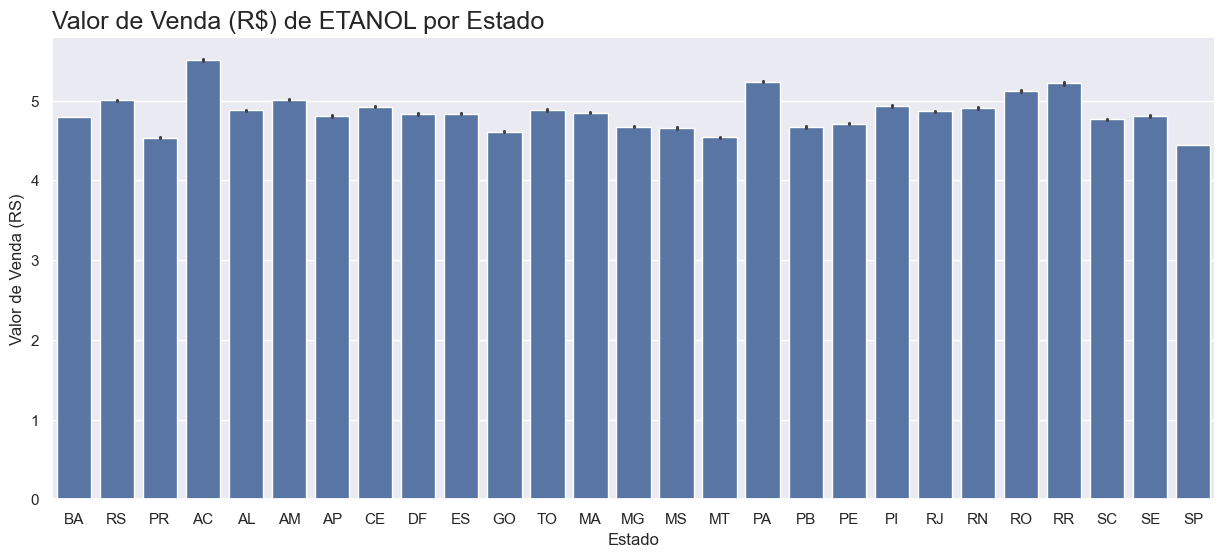

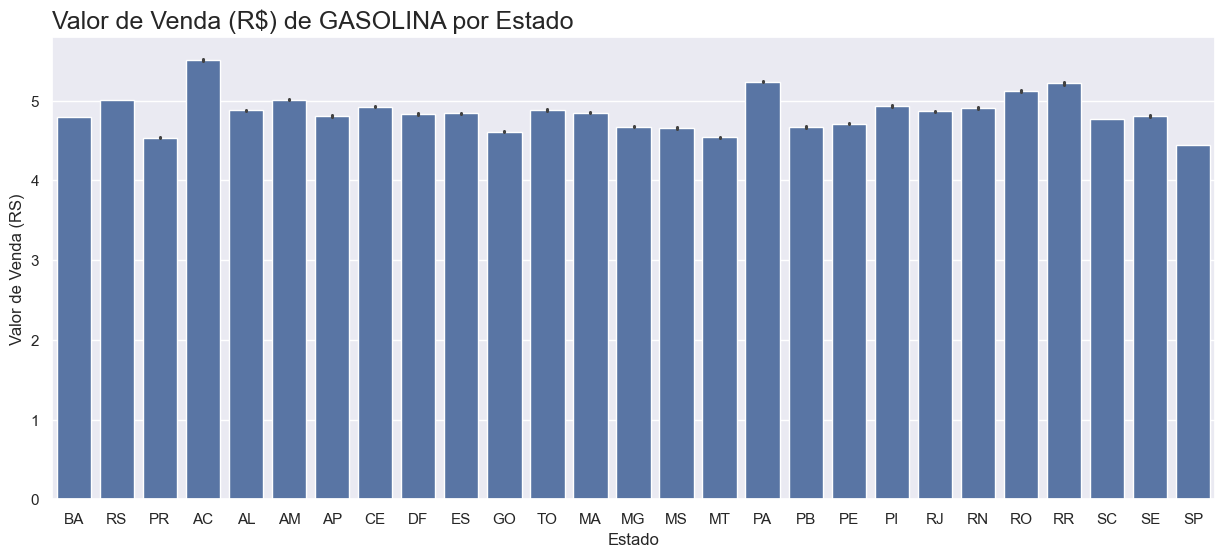

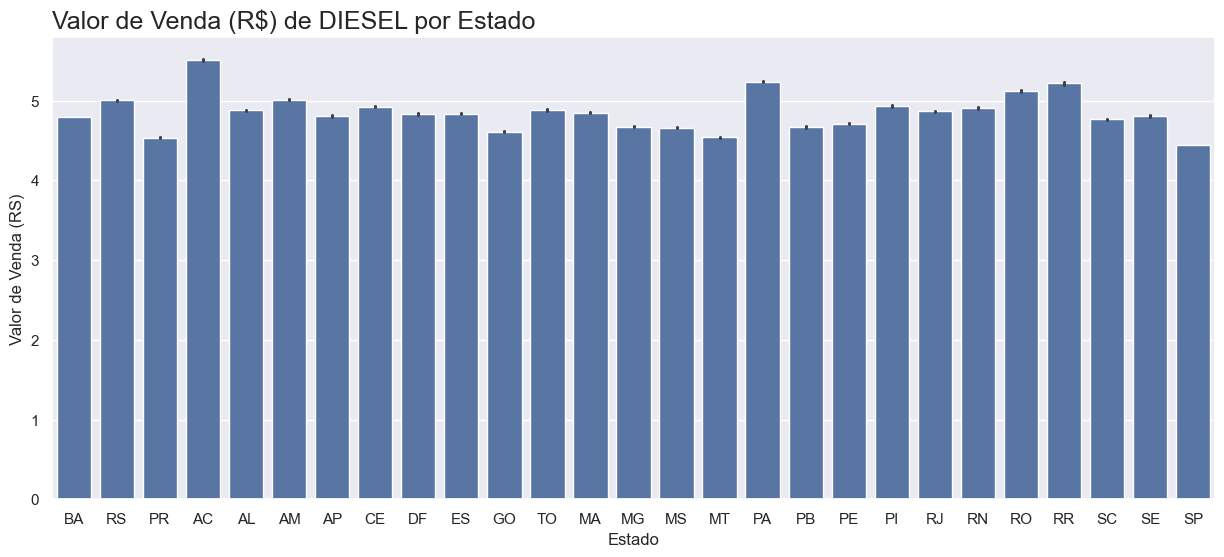

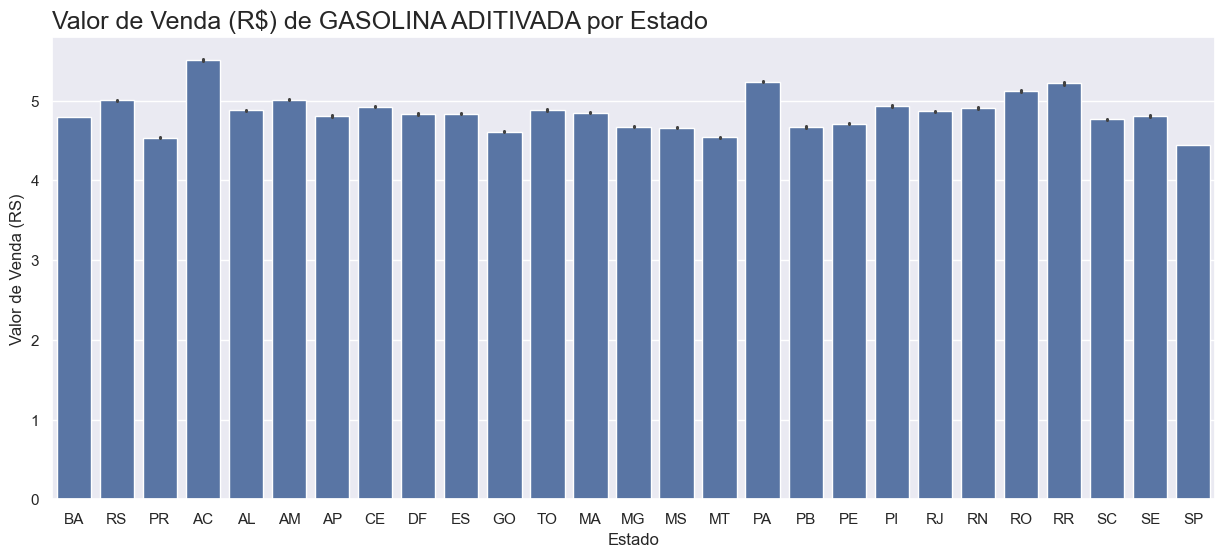

In [26]:
for produto in dados_combustiveis.produto.unique():
    plot_barplot(df=dados_combustiveis, x_axis='estado', y_axis='valor_venda', produto=produto)

Quantidade de bandeiras por ano:

In [27]:
dados_combustiveis.groupby(['ano', 'produto'])['bandeira'].nunique()

ano   produto           
2018  DIESEL                64
      DIESEL S10            66
      ETANOL                66
      GASOLINA              66
      GNV                   24
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                57
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    57
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
2023  DIESEL                43
      DIESEL S10            46
      ETANOL                47
      GASOLINA

Quantidade de bandeiras por ano e estado

In [1]:
dados_combustiveis.groupby(['ano', 'produto', 'estado'])['bandeira'].nunique()

NameError: name 'dados_combustiveis' is not defined